<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Titanic_Tensor_Logistic_Regression_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Load the Titanic dataset from TensorFlow Datasets
# Since there is only 'train' split, we will split it manually into train and test sets
ds_all, ds_info = tfds.load('titanic', split='train', with_info=True)

In [29]:
# Convert the dataset to a Pandas DataFrame for easier preprocessing
def tfds_to_dataframe(tfds_dataset):
    # Initialize empty lists to store data
    data = []
    for example in tfds_dataset:
        # Convert each example to numpy
        example_np = tfds.as_numpy(example)
        data.append(example_np)
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)
    return df

In [30]:
# Convert the dataset to a DataFrame
df_all = tfds_to_dataframe(ds_all)

# Shuffle the DataFrame
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)

# Fill missing values and preprocess data
# Fill missing 'age' with median
df_all['age'] = df_all['age'].fillna(df_all['age'].median())

# Fill missing 'embarked' with mode
df_all['embarked'] = df_all['embarked'].fillna(df_all['embarked'].mode()[0])

# Replace 'Unknown' in 'embarked' with mode
df_all['embarked'] = df_all['embarked'].replace(b'Unknown', df_all['embarked'].mode()[0])

# One-hot encode categorical variables: 'sex', 'embarked', 'pclass'
df_all = pd.get_dummies(df_all, columns=['sex', 'embarked', 'pclass'])

# Drop unnecessary columns
df_all = df_all.drop(['deck', 'fare', 'parch', 'sibsp', 'alone', 'who', 'adult_male', 'embark_town', 'cabin', 'ticket'], axis=1, errors='ignore')

In [31]:
# Drop any remaining non-numeric columns
for col in df_all.columns:
    if df_all[col].dtype == 'object' or df_all[col].dtype == 'O':
        df_all = df_all.drop(col, axis=1)

In [32]:
# Split back into train and test sets (80% train, 20% test)
split_index = int(len(df_all) * 0.8)
df_train_processed = df_all.iloc[:split_index]
df_test_processed = df_all.iloc[split_index:]

In [33]:
# Separate features and labels
X_train = df_train_processed.drop('survived', axis=1)
y_train = df_train_processed['survived']

X_test = df_test_processed.drop('survived', axis=1)
y_test = df_test_processed['survived']

In [34]:
# Convert to NumPy arrays and ensure float32 data type
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)

X_test = X_test.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [35]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Method 1: Logistic Regression using Keras
# Build the model
model_logistic = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
model_logistic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_logistic = model_logistic.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6291 - loss: 0.6981 - val_accuracy: 0.6450 - val_loss: 0.6546
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.6703 - val_accuracy: 0.6870 - val_loss: 0.6302
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.6225 - val_accuracy: 0.6908 - val_loss: 0.6080
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.5727 - val_accuracy: 0.6985 - val_loss: 0.5885
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.6039 - val_accuracy: 0.7099 - val_loss: 0.5707
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7311 - loss: 0.5729 - val_accuracy: 0.7519 - val_loss: 0.5548
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5640 - val_accuracy: 0.7557 - val_loss: 0.5409
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7472 - loss: 0.5448 - val_accuracy: 0.7634 - val_loss:

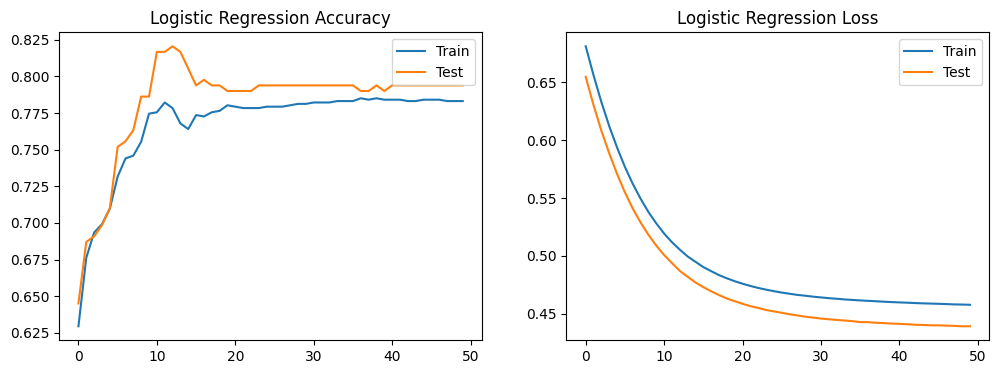

In [37]:
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_logistic.history['accuracy'], label='Train')
plt.plot(history_logistic.history['val_accuracy'], label='Test')
plt.title('Logistic Regression Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_logistic.history['loss'], label='Train')
plt.plot(history_logistic.history['val_loss'], label='Test')
plt.title('Logistic Regression Loss')
plt.legend()
plt.show()

In [38]:
# Evaluate the model
loss, accuracy = model_logistic.evaluate(X_test, y_test)
print(f'Logistic Regression Test Accuracy: {accuracy:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4657 
Logistic Regression Test Accuracy: 0.7939
